Estas librerias uso para procesar y mostrar los primeros graficos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mplleaflet


%matplotlib inline
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11, 4)})

Leemos los datos y los llevamos a un Dataframe

In [3]:
data= pd.read_csv('VED_all_trips_EVs.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%],Altitude[m],Day,Year,Month,Weekday Name,Weekday,Hour,Date
0,1.719774,10,1558,0,42.277066,-83.763404,53.590000,NaN,NaN,NaN,...,NaN,NaN,265.4,2017-11-01 17:16:28.456800,2017,11,Wednesday,2,17,2017-11-01
1,1.719774,10,1558,200,42.277066,-83.763404,51.980000,NaN,NaN,NaN,...,NaN,NaN,265.4,2017-11-01 17:16:28.456800,2017,11,Wednesday,2,17,2017-11-01
2,1.719774,10,1558,1200,42.277066,-83.763404,50.369999,NaN,NaN,NaN,...,NaN,NaN,265.4,2017-11-01 17:16:28.456800,2017,11,Wednesday,2,17,2017-11-01
3,1.719774,10,1558,1500,42.277066,-83.763404,50.369999,NaN,NaN,NaN,...,NaN,NaN,265.4,2017-11-01 17:16:28.456800,2017,11,Wednesday,2,17,2017-11-01
4,1.719774,10,1558,2300,42.277066,-83.763404,49.799999,NaN,NaN,NaN,...,NaN,NaN,265.4,2017-11-01 17:16:28.456800,2017,11,Wednesday,2,17,2017-11-01


## Mirando viajes en especifico

Busquemos el viaje mas largo

In [6]:
data.loc[data['Timestamp(ms)'].idxmax()]

DayNum                                               231.636
VehId                                                     10
Trip                                                    2612
Timestamp(ms)                                        4723200
Latitude[deg]                                         42.282
Longitude[deg]                                       -83.751
Vehicle Speed[km/h]                                    49.39
MAF[g/sec]                                               NaN
Engine RPM[RPM]                                          NaN
Absolute Load[%]                                         NaN
OAT[DegC]                                               33.5
Fuel Rate[L/hr]                                          NaN
Air Conditioning Power[kW]                               NaN
Air Conditioning Power[Watts]                           1050
Heater Power[Watts]                                        0
HV Battery Current[A]                                  -14.5
HV Battery SOC[%]       

In [7]:
data[data['Trip']==2612].columns

Index(['DayNum', 'VehId', 'Trip', 'Timestamp(ms)', 'Latitude[deg]',
       'Longitude[deg]', 'Vehicle Speed[km/h]', 'MAF[g/sec]',
       'Engine RPM[RPM]', 'Absolute Load[%]', 'OAT[DegC]', 'Fuel Rate[L/hr]',
       'Air Conditioning Power[kW]', 'Air Conditioning Power[Watts]',
       'Heater Power[Watts]', 'HV Battery Current[A]', 'HV Battery SOC[%]',
       'HV Battery Voltage[V]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]', 'Altitude[m]', 'Day', 'Year', 'Month',
       'Weekday Name', 'Weekday', 'Hour', 'Date'],
      dtype='object')

# Ruta

In [8]:
data_t2612=data[data['Trip']==2612]
ax = plt.plot(data_t2612['Longitude[deg]'], data_t2612['Latitude[deg]'], 'b', linewidth=3)
mplleaflet.display()

# Variables Electricas

Construimos un vector de tiempo en minutos

In [9]:
data_t2612['Timestamp(m)'] = data_t2612['Timestamp(ms)']/60000

C:\Users\Alonso\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


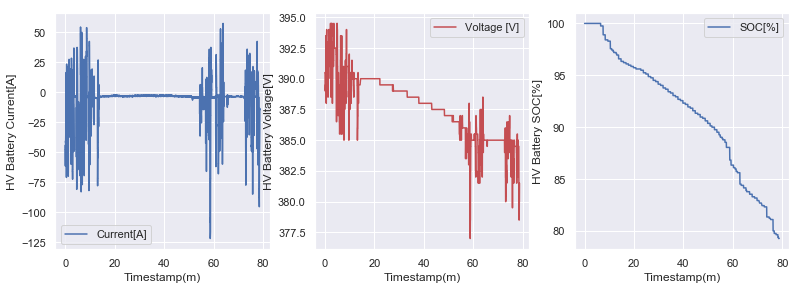

In [11]:
f, axes = plt.subplots(1, 3)
f.tight_layout()
sns.lineplot(x="Timestamp(m)", y="HV Battery Current[A]", data=data_t2612, label='Current[A]', ax=axes[0])
sns.lineplot(x="Timestamp(m)", y="HV Battery SOC[%]", data=data_t2612, label='SOC[%]', ax=axes[2])
sns.lineplot(x="Timestamp(m)", y="HV Battery Voltage[V]", data=data_t2612, label='Voltage [V]', color='r', ax=axes[1])

# Trabajo Propuesto

* Ya que tenemos coordendas gps (lat, lon en grados) y la elevacion en metros, seria deseable tener todo en coordenadas x,y,z en algun sistema geometrico. OpenStreetMap nos ayudaria a conseguir eso.
* Investiguemos que otros datos agregar a los datos que ya tenemos. Mientras mas informacion se tenga los algoritmos basados en datos que construyamos seran mejores.
* Investigar como funcionan los vehiculos PHEV. Quizas podamos usarlos en nuestro estudio si tomamos algunos supuestos.